<a href="https://colab.research.google.com/github/Ashuku001/ML_NLP/blob/main/cha2_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install datasets && touch /root/.ipython/profile_default/startup/00-first.py && echo "import datasets" >> /root/.ipython/profile_default/startup/00-first.py
from  datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently availaable on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")


There are 52616 datasets currently availaable on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [50]:
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [51]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [52]:
len(train_ds)

16000

In [53]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [54]:
train_ds.column_names

['text', 'label']

In [55]:
train_ds.features # we have text and label of type?

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [56]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [57]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [58]:
import pandas as pd
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head() # the headers will be preserved

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [59]:
# the labels are still integers so we can use
def label_int2str(row):
  # convert the features label into string instead of int
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


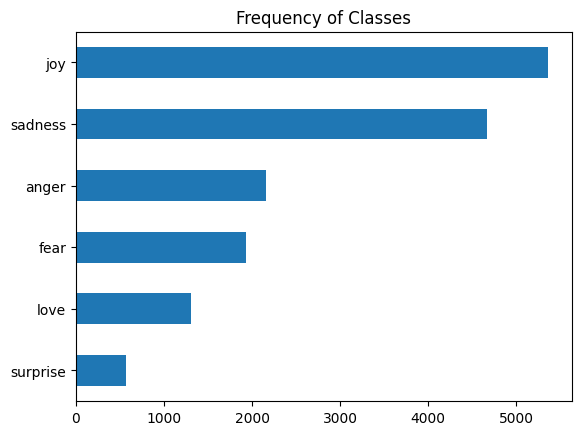

In [60]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

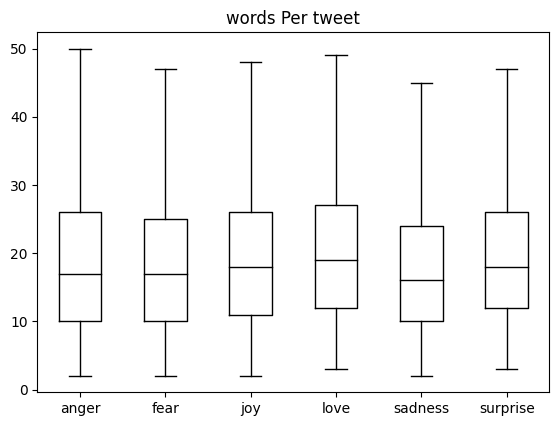

In [61]:
df["words Per tweet"] = df["text"].str.split().apply(len)
df.boxplot("words Per tweet", by = "label_name", grid=False,
           showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [62]:
# reset from DataFrames
emotions.reset_format()

In [63]:
# Character tokenization
text2 = "Tokenizing text is a core task of NLP"
tokenized_text = list(text2)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [64]:
# numericalization
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)
# this gices a mapping of each character to an integer

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'f': 8, 'g': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17, 'z': 18}


In [65]:
# the char a key in token2idx maps to an integer the ids
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


In [66]:
# suppose we want to encode the names of characters in the transformers
categorical_df = pd.DataFrame(
    {"name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [67]:
pd.get_dummies(categorical_df["name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [68]:
# create one-hot encodings in PyTorch by converting input_ids to a tensor and apply the one_hot() function
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids) # convert the ids into a tensor
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx)) # apply one hot (number of classes is the size of the token2idx)
one_hot_encodings.shape

torch.Size([37, 19])

In [69]:
# examining the first vector
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}") # the token T encoded by 1 at position 4 of the encodings

Token: T
Tensor index: 4
One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [70]:
# using white space to tokenize the text
text = "Tokenizing text is a core task of NLP"
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']


In [71]:
# subword tokenization
# automatic loading of the class distilbert
!pip install transformers
from transformers import AutoTokenizer # from transformer
model_ckpt = "distilbert-base-uncased" # the model id
tokenizer = AutoTokenizer.from_pretrained(model_ckpt) # returns the tokenizer

In [72]:
# loading th class manually e.g. the DistilBERT tokenizer
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt) # pass the model key

In [73]:
# testing the toknizer
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [74]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


In [75]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp [SEP]


In [76]:
tokenizer.vocab_size # to explore the vocabulary size

30522

In [77]:
tokenizer.model_max_length # the maximum content size

512

In [78]:
tokenizer.model_input_names # the name of the fields the model expects in its forward pass

['input_ids', 'attention_mask']

In [79]:
# Tokenizing the whole dataset
# to apply tokenier to a batch of examples
def tokenize(batch):
  # pad e.gs to the size of the longes one in the batch then truncate to the model's maximum context size
  return tokenizer(batch["text"], padding=True, truncation=True)

In [80]:
print(tokenize(emotions["train"][:2])) # pass a dictionary with "text": (a list of emotions)

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [81]:
# applying in all the dataset
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)


In [82]:
# after tokenizing the resulting dataset also include input_ids and attention_masks
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [83]:
# Training a text classifier
# using pretrained models
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased" # the pretrained model key
# check if a GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # the device either a GPU or a CPU
model = AutoModel.from_pretrained(model_ckpt).to(device) # add model to the device usint .to

In [84]:
# Interoperability Between Frameworks
# loading DistilBERT in tensorflow
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained(model_ckpt, from_pt = True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [85]:
# Extracting the last hidden states
text = "this is a test" # the text
inputs = tokenizer(text, return_tensors="pt") # tokenize if returns
# a list with the batch_size and the number of tokens
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [86]:
# now pass the tensor encodings to the same device as the modela nd pass the inputs
inputs = {k:v.to(device) for k, v in inputs.items()} # the (k,v) pair of encodings in tensor add to the device
with torch.no_grad(): # disable automatic calculation of the gradient
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [87]:
outputs.last_hidden_state.size() #[batch_size, n_tokens, hidden_state_dim]

torch.Size([1, 6, 768])

In [88]:
# the hidden input associated with [CLS]
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [89]:
# now getting the last hidden state for the whole dataset
# we create a new hidden_state column to store all the vectors
def extract_hidden_states(batch):
  # place model inputs on the GPU if it is in the tokenizer.
  inputs = {k: v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}

  # extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state

  # return vector for [CLS] token place it back to the CPU as a Numpy array
  return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [90]:
# convert the input_ids and attention_mask columns to tensors for the model inputs
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [91]:
# then we extract the hidden inputs accross the splits in on go
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # for this case we use default batch_size of 1000

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [92]:
# after applying the extract_hidden_function() it adds
# a new hidden_state column to the dataset
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [93]:
# Creating a feature matrix
import numpy as np
# hidden state of dataset features on train and validation as input features
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
# labels of dataset features on train and validation as targets
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [94]:
# Visualizing the training set
!pip install umap-learn
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler
# scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()
# result a hidden_state from 768 dim to 2 dim
# df_emb contains the hidden states in 2D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=a3e06ec20aa3a32a7ec8a7a73a89ba063d94e17a9574d8d4c502fea4dc2e55c7
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=b02dbe7e1697ef0dc9abced1901fbb8d9e5c6039344d0a0008babb3573e270d8
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


,X,Y,label
0,4.590779,6.609666,0
1,-2.455552,6.471039,0
2,5.337820,2.987395,3
3,-2.096767,4.206673,2
4,-3.200739,4.407105,3


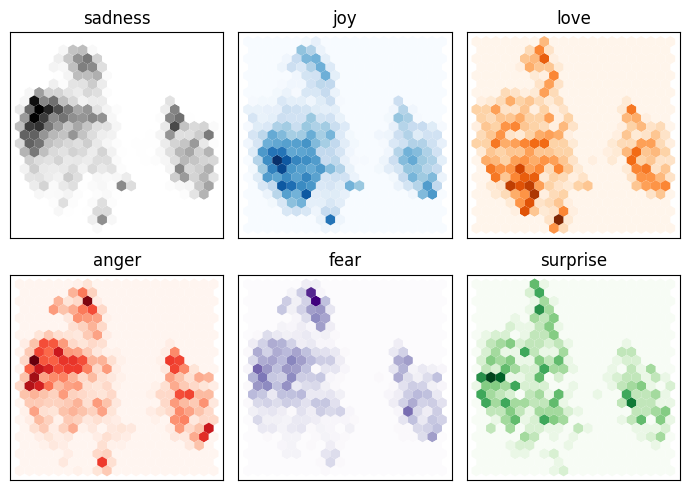

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"] # 6 emotions
labels = emotions["train"].features["label"].names # 6 targets classifying the emotions

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}") # query the label of the hidden_state
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"],
                 cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([])
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [96]:
# Training a simple classifier
from sklearn.linear_model import LogisticRegression
# We increase "max_iter" to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000) # an instance of the model
lr_clf.fit(X_train, y_train) # the hidden state training set and the target
lr_clf.score(X_valid, y_valid) # validate the model on the validation set

0.634

In [97]:
#Compare the lr_clf with a simple baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

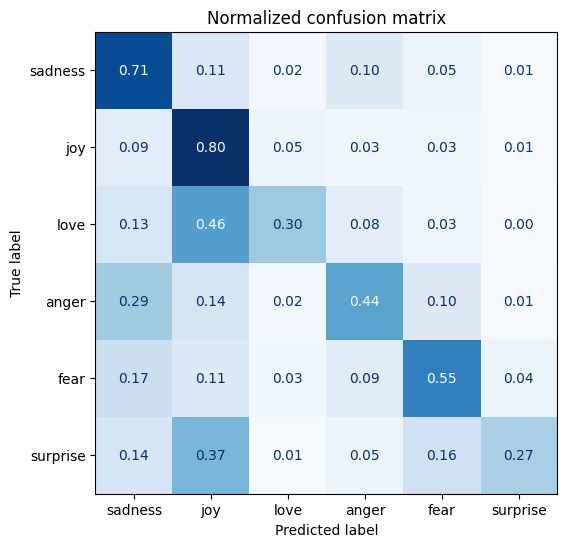

In [98]:
# To get the relationship between the true and predicted labels
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid) # get the predictions
# plot the confusion matrix with the predicitons
plot_confusion_matrix(y_preds, y_valid, labels)

In [99]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [100]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [101]:
from huggingface_hub import notebook_login
notebook_login()

In [102]:
#Training the model
! pip install -U accelerate
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [104]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Cloning https://huggingface.co/Ashuku/distilbert-base-uncased-finetuned-emotion into local empty directory.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.541300,0.198076,0.926500,0.927617
2,0.143700,0.145350,0.933000,0.932756


TrainOutput(global_step=500, training_loss=0.3424661560058594, metrics={'train_runtime': 13716.497, 'train_samples_per_second': 2.333, 'train_steps_per_second': 0.036, 'total_flos': 720342861696000.0, 'train_loss': 0.3424661560058594, 'epoch': 2.0})

We get an F1 score of 93 percent which is very good performance

In [105]:
# To visualize the confusion matrix pass the validation set to the .predict()
preds_output = trainer.predict(emotions_encoded["validation"])

In [106]:
# the metrics on the validation set
preds_output.metrics

{'test_loss': 0.14534975588321686,
 'test_accuracy': 0.933,
 'test_f1': 0.9327558871926276,
 'test_runtime': 240.1603,
 'test_samples_per_second': 8.328,
 'test_steps_per_second': 0.133}

In [107]:
# To decode predictions greedily use np.argmax
y_preds = np.argmax(preds_output.predictions, axis=1)

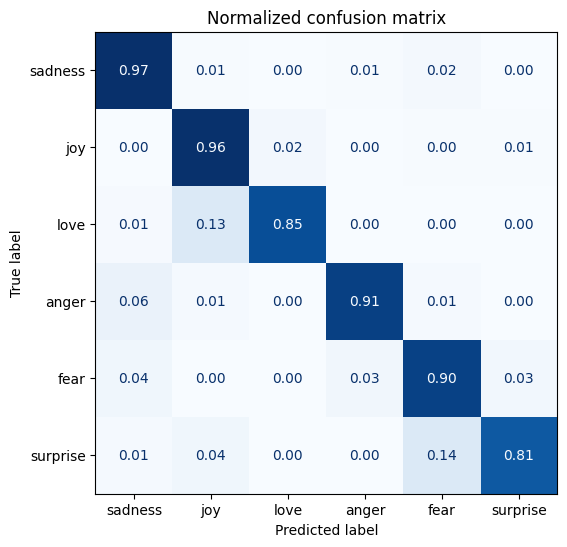

In [108]:
# with predictins we can plot the confusion matrix again
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
# Fine tuning with keras
from transformers import TFAutoModelForSequenceClassification
tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                    num_labels=num_labels)
)

In [ ]:
# conver the datasets into tf.data.Dataset format
# since we already padded our tokenized inputs
# the column names to convert to TensorFlow tensors
tokenizer_columns = tokenizer.model_input_names
# convert the training set
tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=batch_size
)
# training the validation set
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=batch_size
)
# we also shuffle the training set and define the batch size for it and validation set


In [ ]:
import tensorflow as tf

# then compile and train the model
tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy()
)
tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

In [112]:
# Error analysis
from torch.nn.functional import cross_entropy

# a function that returns the loss along with the predicted label
def forward_pass_with_label(batch):
  # place all input tensors on the same device as the model
  inputs = {k: v.to(device) for k, v in batch.items()
            if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                         reduction="none")
  # place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(),
          "predicted_label": pred_label.cpu().numpy()}

In [113]:
# using map() to apply the above function to get loses of the samples
# convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

# compute loss values
emotions_encoded["validation"]  = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [114]:
# Then we create a DataFrame with the texts, losses ad predicted/true labels
emotions_encoded.set_format("pandas") # format the encodings to pandas
cols = ["text", "label", "predicted_label", "loss"] # the columns
df_test = emotions_encoded["validation"][:][cols] # for the validation set everything according to the columns
df_test["label"] = df_test["label"].apply(label_int2str) # convert the label into strings
df_test["predicted_labels"] = (df_test["predicted_label"].apply(label_int2str)) # the predicted label into string

In [115]:
# having the highest loss function probably bad production
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss,predicted_labels
1950,i as representative of everything thats wrong ...,surprise,0,6.199629,sadness
177,im sure much of the advantage is psychological...,sadness,1,5.730404,joy
1111,im lazy my characters fall into categories of ...,joy,4,5.573557,fear
1500,i guess we would naturally feel a sense of lon...,anger,0,5.091808,sadness
882,i feel badly about reneging on my commitment t...,love,0,4.962774,sadness
1840,id let you kill it now but as a matter of fact...,joy,4,4.864192,fear
415,im kind of embarrassed about feeling that way ...,love,1,4.590466,joy
1801,i feel that he was being overshadowed by the s...,love,0,4.322746,sadness
1124,someone acting stupid in public,anger,0,4.086651,sadness
1963,i called myself pro life and voted for perry w...,joy,0,3.886785,sadness


In [116]:
# with the lowest function is. the model is sure when predicting joy
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss,predicted_labels
212,i own the brushes are constantly used and i fe...,joy,1,0.003383,joy
752,i really do like the feeling of accomplishing ...,joy,1,0.003412,joy
1884,i don t exactly feel sociable still,joy,1,0.003417,joy
702,i only find out that they are looking and feel...,joy,1,0.003420,joy
1976,i trust heavily when i feel that the trust is ...,joy,1,0.003446,joy
859,i feel not worthwhile,joy,1,0.003485,joy
1418,i am a big believer in the phrase that some pe...,joy,1,0.003485,joy
1198,i feel like i should also mention that there w...,joy,1,0.003485,joy
1873,i feel practically virtuous this month i have ...,joy,1,0.003494,joy
1017,i will be happy when someone i know from acros...,joy,1,0.003511,joy


In [117]:
# saving and sharing the model push the model to the hub
trainer.push_to_hub(commit_message="Training completed!")

To https://huggingface.co/Ashuku/distilbert-base-uncased-finetuned-emotion
   1fcd38d..af64769  main -> main

   1fcd38d..af64769  main -> main

To https://huggingface.co/Ashuku/distilbert-base-uncased-finetuned-emotion
   af64769..64248a6  main -> main

   af64769..64248a6  main -> main



'https://huggingface.co/Ashuku/distilbert-base-uncased-finetuned-emotion/commit/af647699580bc27f824dd8312db0c981d7dcfc92'

In [2]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00


In [6]:
# load the training dataset and get its labels for the graph
from datasets import load_dataset
emotions = load_dataset("emotion")
labels = emotions["train"].features['label'].names
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [7]:
# using the model to predict on new tweets
# we load the model from the hub using the pipeline function
# get the model from the hub
model_id = "Ashuku/distilbert-base-uncased-finetuned-emotion" # the model id
classifier = pipeline("text-classification", model=model_id) # using pipeline to get the model

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [16]:
# using the loaded pipeline to make predictions
custom_tweet = "I don't want to see those pictures"
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


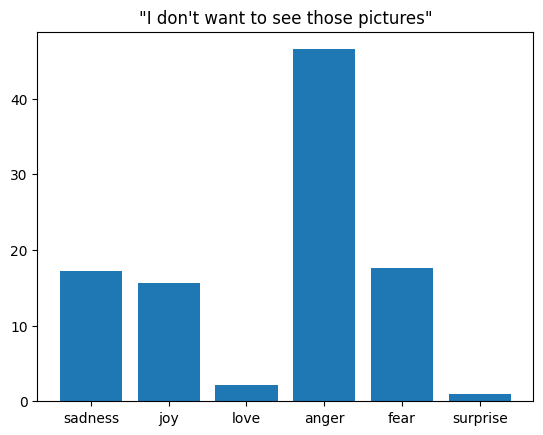

<Figure size 150x150 with 0 Axes>

In [17]:
# plotting the probability for each class in a bar plot
import matplotlib.pyplot as plt
import pandas as pd
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"], color="C0")
plt.title(f'"{custom_tweet}"')
plt.figure(figsize=(1.5, 1.5))
plt.show()